# Prac 06.1

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import dlib
plt.rcParams['figure.figsize'] = [15, 10]

### Step 1

Load an image (any image that contains faces).

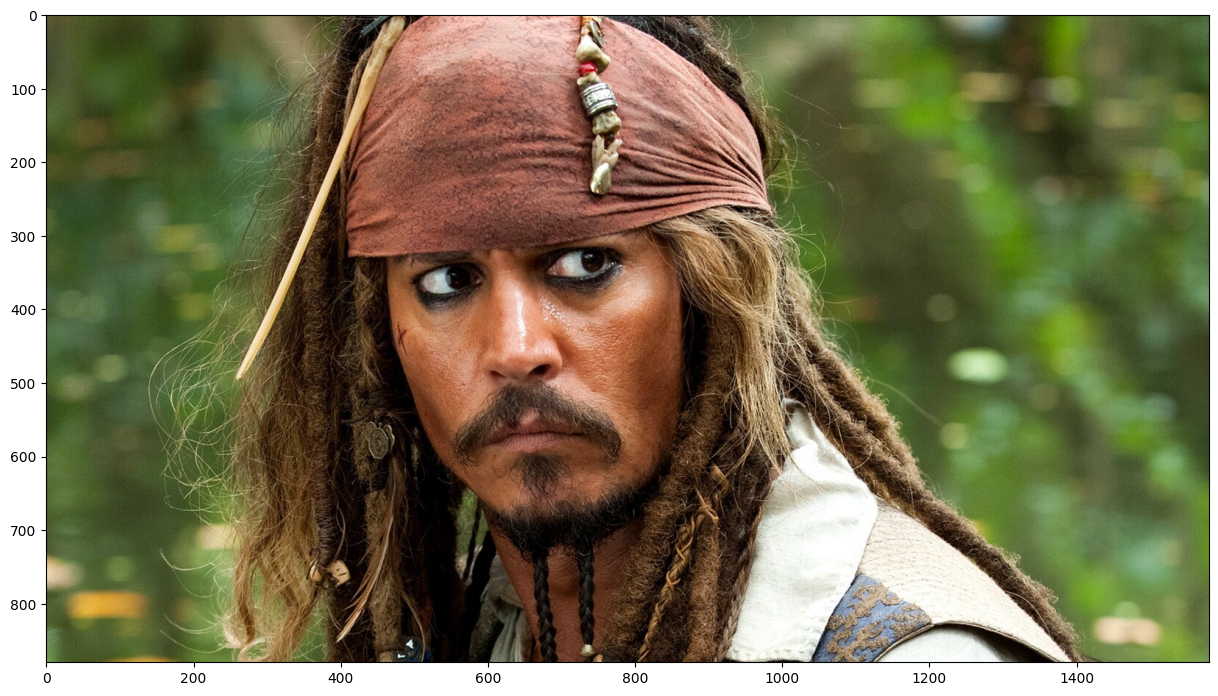

In [28]:
img = cv2.imread('data/image.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

### Step 2

Load the dlib face predictor.

Number of detected faces: 1
rectangles[[(399, 194) (861, 657)]]
<bound method PyCapsule.left of rectangle(399,194,861,657)>
399 194 462 463


Text(0.5, 1.0, 'dlib')

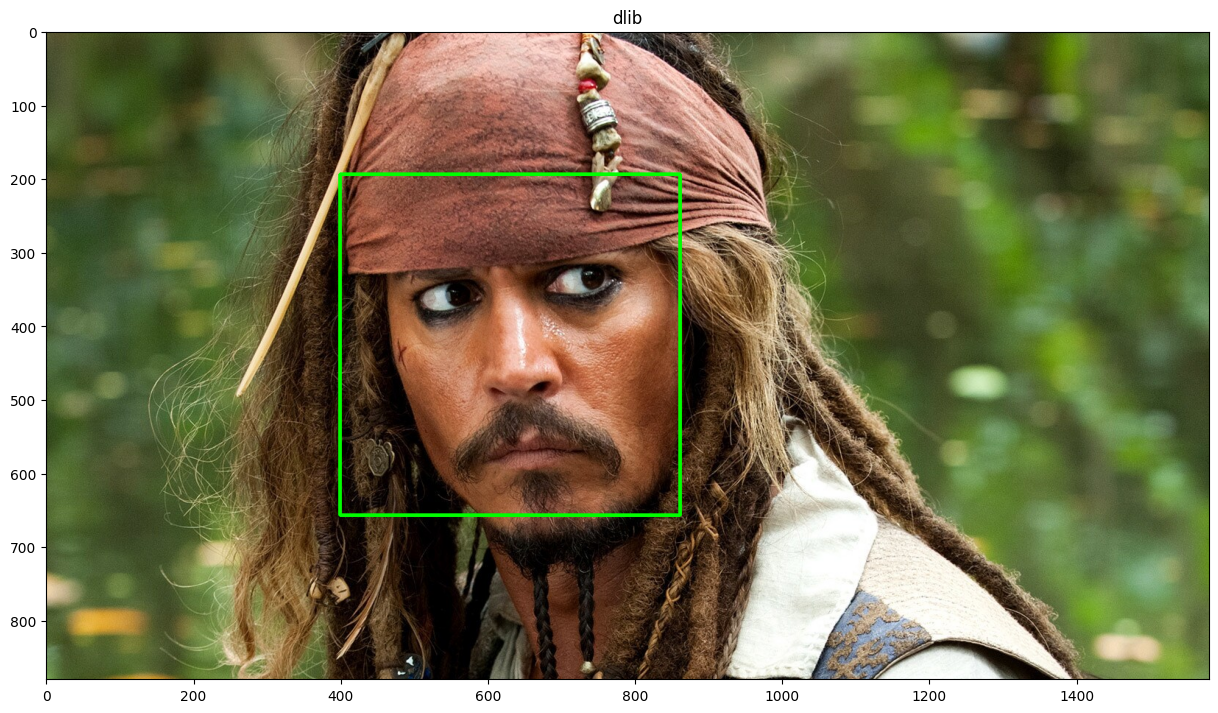

In [29]:
detector = dlib.get_frontal_face_detector()

rects = detector(gray, 1)

print('Number of detected faces:', len(rects))
print(rects)
print(rects[0].left)

def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return x, y, w, h


result_dlib = np.copy(img)
faces_dlib_img = []
for rect in rects:
    x, y, w, h = rect_to_bb(rect)
    print(x, y, w, h)
    cv2.rectangle(result_dlib, (x, y), (x+w, y+h), (0, 255, 0), 3)
    faces_dlib_img.append(img[y:y+h, x:x+w, :])


plt.imshow(result_dlib)
plt.title('dlib')

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?